In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
%matplotlib inline

In [ ]:
d = pd.read_csv("data/reedfrogs.csv", sep=",")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


In [ ]:
# Make the tank cluster variable
tank = np.arange(d.shape[0])
n_tanks = d.shape[0]

# Fit model
with pm.Model() as m13_1:
    a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    p = pm.Deterministic("p", pm.math.invlogit(a[tank]))
    
    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    
    trace13_1 = pm.sample()

az.summary(trace13_1, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],1.73,0.77,0.31,3.11,0.01,0.01,7765.56,4599.22,8533.79,3149.49,1.0
a[1],2.43,0.91,0.83,4.17,0.01,0.01,7098.10,4899.20,7775.43,2568.02,1.0
a[2],0.75,0.65,-0.49,1.96,0.01,0.01,9045.27,3555.20,9321.38,2931.52,1.0
a[3],2.41,0.92,0.73,4.13,0.01,0.01,6505.13,4264.43,7323.25,2499.25,1.0
a[4],1.73,0.77,0.34,3.26,0.01,0.01,6440.28,3344.03,7217.59,2149.90,1.0
...,...,...,...,...,...,...,...,...,...,...,...
p[43],0.40,0.08,0.26,0.55,0.00,0.00,8471.00,7688.56,8412.74,2921.66,1.0
p[44],0.62,0.08,0.48,0.78,0.00,0.00,10428.60,9809.39,10212.49,2586.56,1.0
p[45],0.35,0.08,0.21,0.49,0.00,0.00,10773.35,8862.84,10952.09,2980.12,1.0
p[46],0.86,0.06,0.76,0.96,0.00,0.00,7907.38,7907.38,8025.83,2687.39,1.0


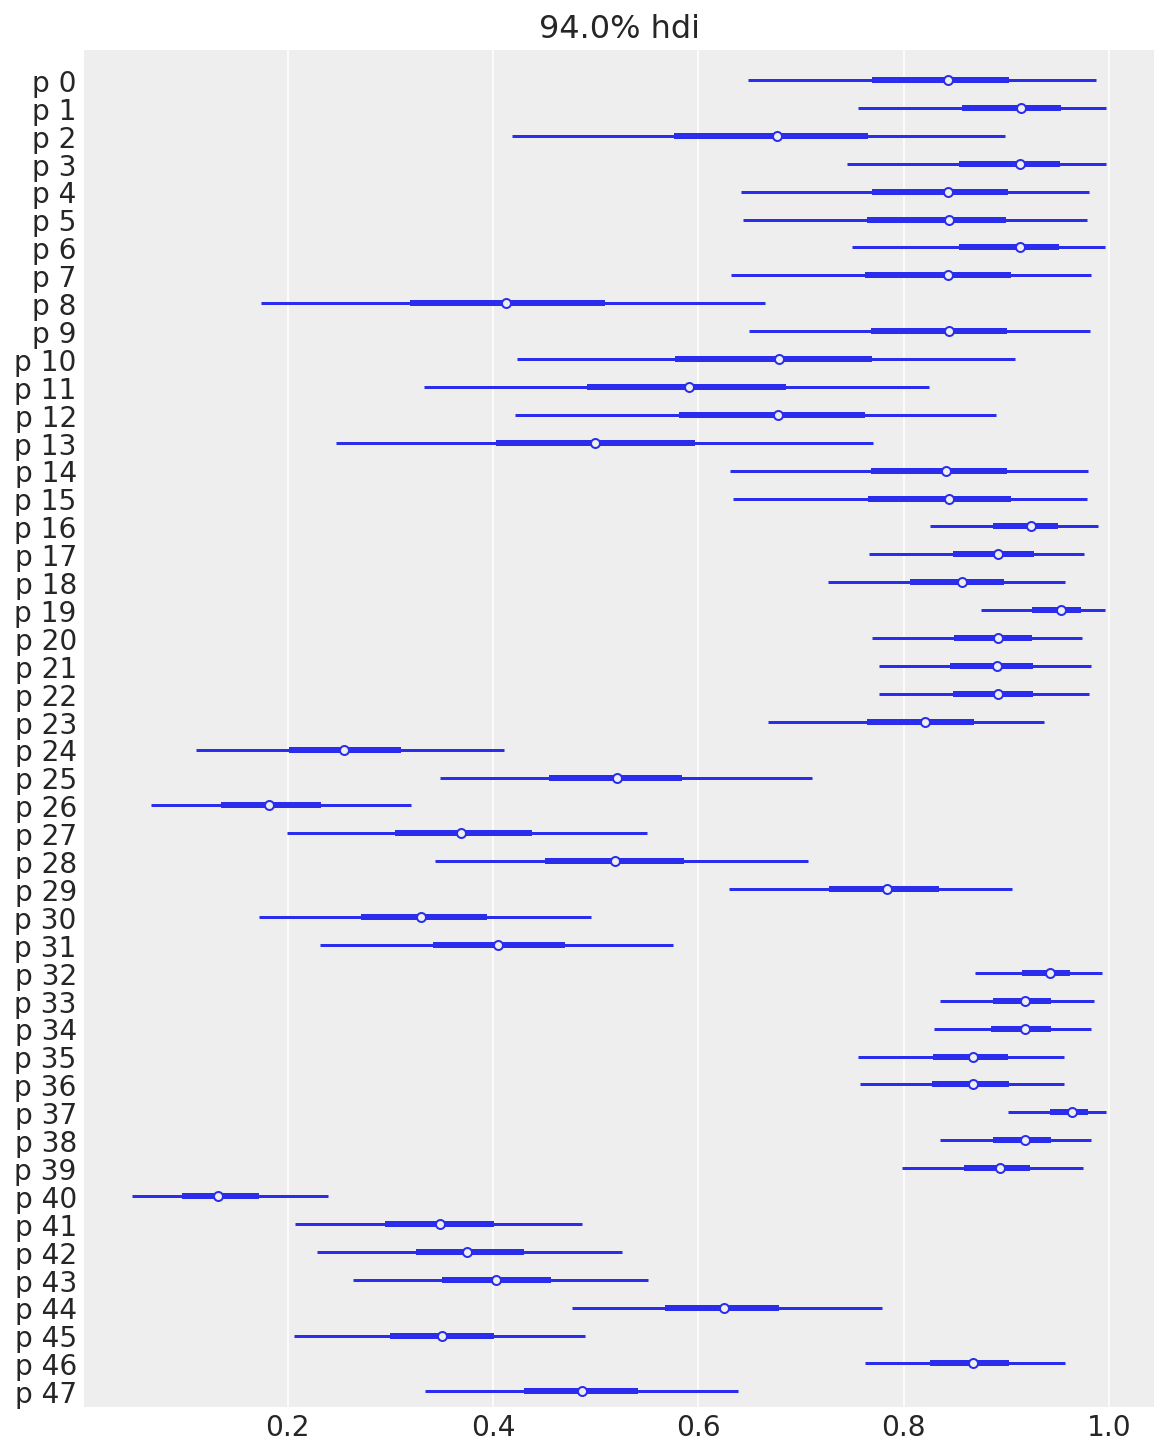

In [ ]:
pm.forestplot(trace13_1, var_names=["p"], figsize=(8,10), combined=True);
plt.show()

In [ ]:
# Fit model
with pm.Model() as m13_2:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)
    
    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.Deterministic("p", pm.math.invlogit(a[tank]))
    
    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    
    trace13_2 = pm.sample()

az.summary(trace13_2, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a_bar,1.35,0.26,0.87,1.84,0.00,0.00,6304.76,5896.89,6332.85,3426.76,1.0
a[0],2.15,0.90,0.53,3.89,0.01,0.01,6808.64,4038.36,7837.39,2607.00,1.0
a[1],3.10,1.18,0.96,5.31,0.02,0.01,5042.50,3741.62,5785.15,2971.70,1.0
a[2],1.01,0.66,-0.22,2.23,0.01,0.01,8614.30,4432.68,8732.68,2738.26,1.0
a[3],3.06,1.12,1.13,5.26,0.01,0.01,5912.96,4312.58,6671.60,2980.56,1.0
...,...,...,...,...,...,...,...,...,...,...,...
p[43],0.42,0.08,0.28,0.57,0.00,0.00,10002.10,8370.72,10254.61,3034.38,1.0
p[44],0.64,0.08,0.49,0.79,0.00,0.00,7894.95,7667.65,7768.69,2576.98,1.0
p[45],0.37,0.08,0.23,0.51,0.00,0.00,9519.56,8884.31,9350.29,2709.15,1.0
p[46],0.88,0.05,0.78,0.96,0.00,0.00,8016.83,8016.83,8831.35,3047.09,1.0


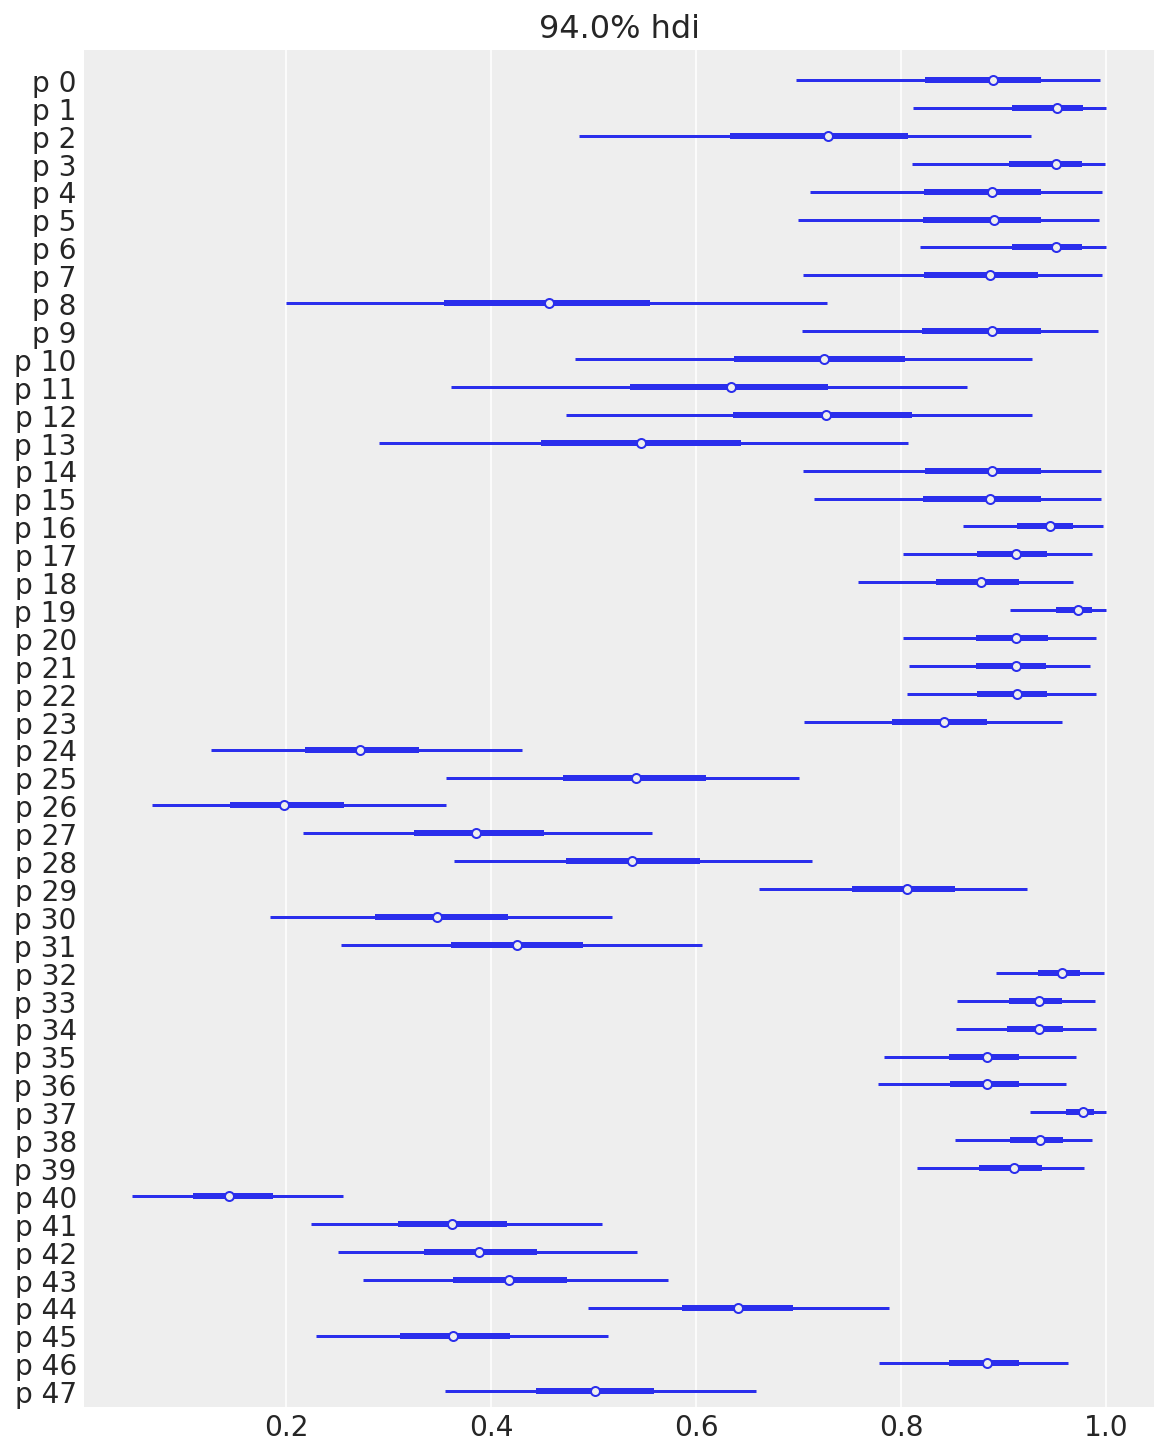

In [ ]:
pm.forestplot(trace13_2, var_names=["p"], figsize=(8,10), combined=True);
plt.show()

In [ ]:
az.compare({"m13_1":trace13_1, "m13_2":trace13_2},
          ic="loo", method="stacking", scale="log");

/opt/conda/lib/python3.7/site-packages/arviz/stats/stats.py:151: UserWarning: 
The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive accuracy.
  "\nThe scale is now log by default. Use 'scale' argument or "
/opt/conda/lib/python3.7/site-packages/arviz/stats/stats.py:671: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/opt/conda/lib/python3.7/site-packages/arviz/stats/stats.py:671: UserWarning: Estimated shape parameter of Pareto distribution is grea

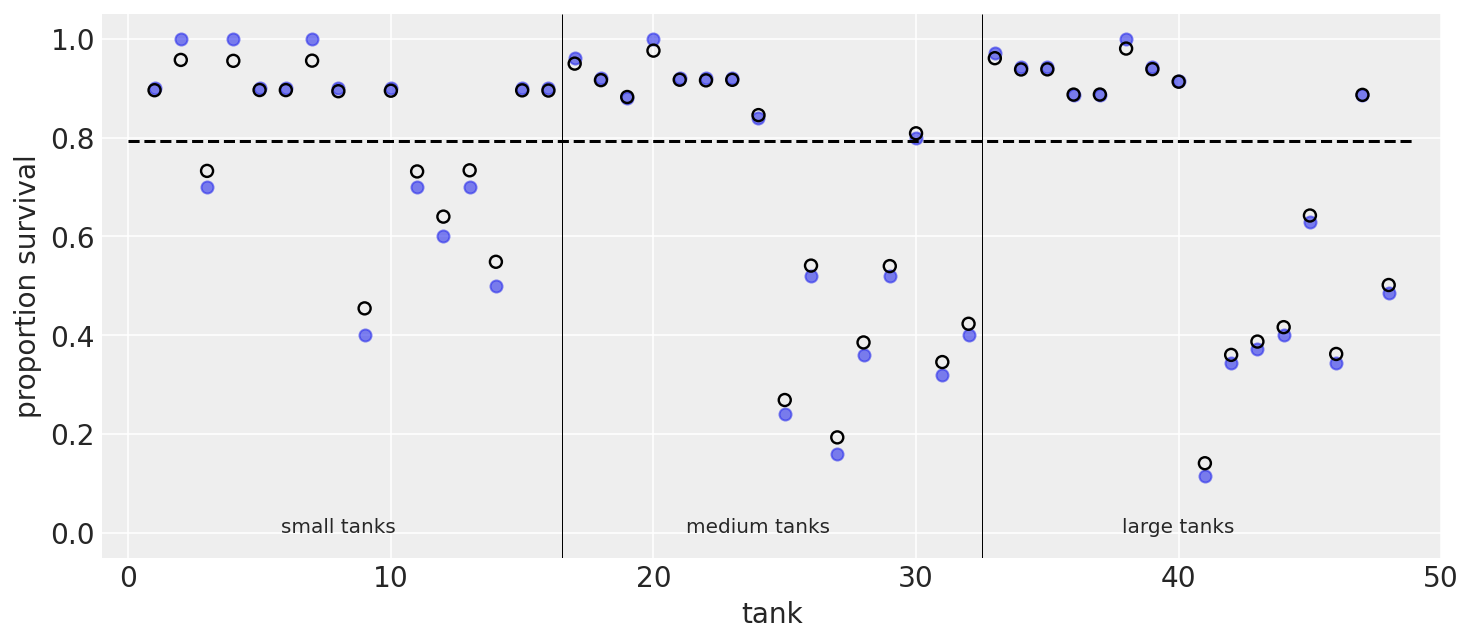

In [ ]:
# compute mean intercept for each tank
# also transform to probability with logistic
propsurv_est = logistic(trace13_2["a"].mean(0))

_, ax = plt.subplots(1, 1, figsize=(12, 5))

# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), d.propsurv, alpha=0.6)

# overlay posterior means
ax.scatter(np.arange(1, 49), propsurv_est, facecolors="none", edgecolors="k", lw=1.2)

# mark posterior mean probability across tanks
ax.hlines(logistic(trace13_2["a_bar"].mean()), 0, 49, linestyles="--")

# draw vertical dividers between tank densities
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

ax.set_xlabel("tank", fontsize=14)
ax.set_ylabel("proportion survival", fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-0.05, 1.05);

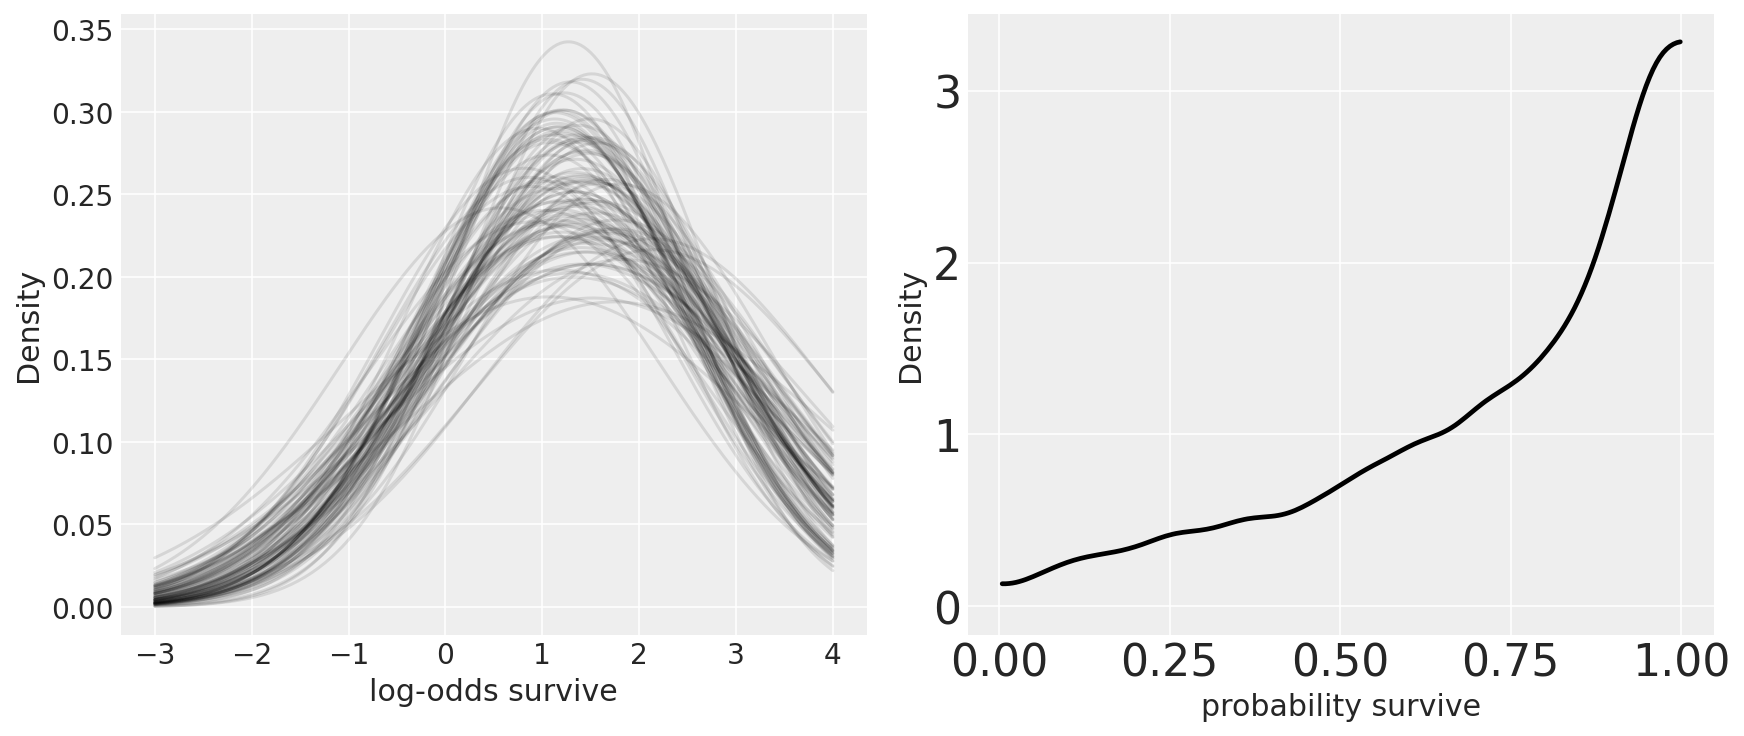

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, loc=trace13_2["a_bar"][i], scale=trace13_2["sigma"][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace13_2["a_bar"], scale=trace13_2["sigma"])

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");